# Handling Classification, Handling Imbalanced Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm 
%matplotlib inline

In [2]:
ChurnData = pd.read_csv('DATA_Customer-Churn.csv')
ChurnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
ChurnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## Transform TotalCharges to Numeric Values

In [4]:
ChurnData = ChurnData.replace('^\s*$',np.nan, regex = True)

In [5]:
ChurnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
ChurnData.shape

(7043, 16)

In [7]:
ChurnData.dropna(axis = 0 ,inplace = True)
ChurnData.shape #11 missing observations are removed

(7032, 16)

In [8]:
ChurnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
ChurnData['TotalCharges']  = pd.to_numeric(ChurnData['TotalCharges'])

## Spilitting Data into Train and Test Set

<b>splitting the data into train and test sets

In [10]:
# Create a new data set for the futures that we're gonna use for the Standart Scaler
Churn_df2 = ChurnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]
Churn_df2

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


In [11]:
# Replace Boolean values in Churn column with numeric values
Churn_df2['Churn'] = Churn_df2['Churn'] .replace(to_replace = "Yes", value = 1)
Churn_df2['Churn'] = Churn_df2['Churn'] .replace(to_replace = "No", value = 0)
Churn_df2['Churn']

/var/folders/c3/pkgzz_891b148813l5gzlgl40000gn/T/ipykernel_84233/1138123559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_df2['Churn'] = Churn_df2['Churn'] .replace(to_replace = "Yes", value = 1)
/var/folders/c3/pkgzz_891b148813l5gzlgl40000gn/T/ipykernel_84233/1138123559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_df2['Churn'] = Churn_df2['Churn'] .replace(to_replace = "No", value = 0)


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [12]:
#Define X and Y 
X=Churn_df2.drop('Churn', axis=1) #split the target from data set
y=Churn_df2.Churn

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   SeniorCitizen   7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [15]:
# Train and test Data set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [16]:
print(X_train.shape)
print(y_train.shape)

(4922, 4)
(4922,)


In [17]:
print(X_test.shape)
print(y_test.shape)

(2110, 4)
(2110,)


## Scale the Data Sets

In [18]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [19]:
X_train.shape

(4922, 4)

In [20]:
X_test_scaled=std_scaler.transform(X_test)

In [21]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.04543972 -0.43362195  1.16616209 -0.71766027]
 [-1.28995855 -0.43362195  0.48534886 -0.97897653]
 [-0.23037695 -0.43362195 -0.52505122 -0.44569599]
 ...
 [-0.88242717 -0.43362195 -1.47552642 -0.90353846]
 [ 0.62543897 -0.43362195  1.17448499  1.1130716 ]
 [-0.96393344 -0.43362195  0.14244537 -0.72615228]]
--------
[[ 0.09564816 -0.43362195 -1.48384932 -0.71275426]
 [-0.5971552  -0.43362195  0.37049284 -0.40974795]
 [ 1.31824232  2.3061563   1.27768895  1.97479047]
 ...
 [-1.20845228 -0.43362195 -1.477191   -0.98610454]
 [-1.04543972 -0.43362195 -1.48218474 -0.95706451]
 [ 0.54393269 -0.43362195 -1.51547634 -0.63364218]]


In [22]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     347.7
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          6.28e-264
Time:                        14:24:24   Log-Likelihood:                -2267.9
No. Observations:                4922   AIC:                             4546.
Df Residuals:                    4917   BIC:                             4578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2525      0.005     46.164      0.0

In [23]:
predictions_test

array([0.05566808, 0.41648831, 0.17511899, ..., 0.18898933, 0.17234022,
       0.00649797])

## Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.794311,0.781805
1,Precision,0.658266,0.675676
2,Recall,0.443916,0.439698


Confusion matrix for the train set
[[3815  339]
 [ 818  653]]


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


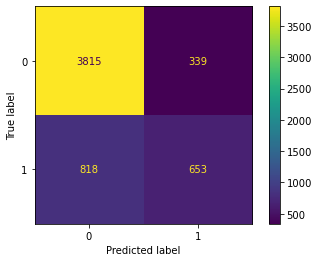



Confusion matrix for the test set
[[925  84]
 [223 175]]


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


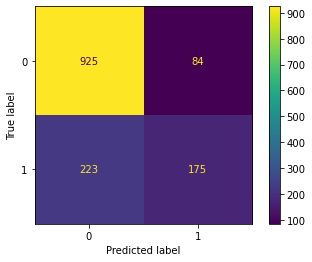

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Knn_Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_test

6466    0
5615    1
5344    0
5564    0
588     0
       ..
5107    0
3220    0
4543    0
3018    0
5661    0
Name: Churn, Length: 1407, dtype: int64

/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


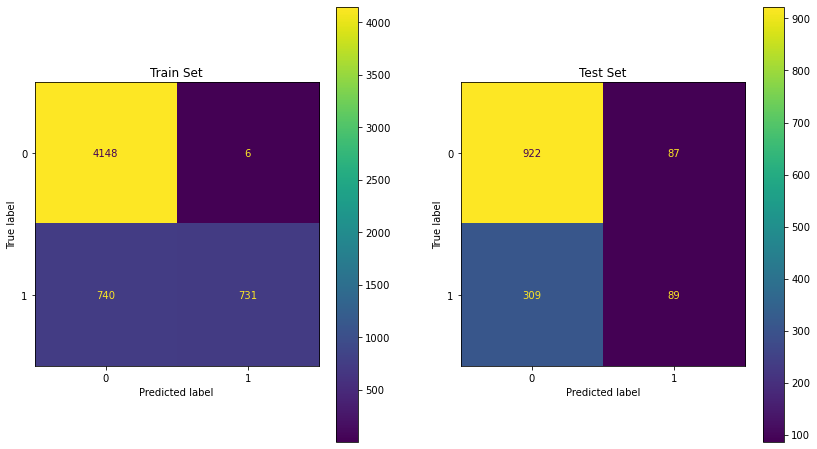

In [28]:
#Classification Model

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [29]:
#Classification Model Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.87,0.72
1,Precision,0.99,0.51
2,Recall,0.50,0.22


## Decision Tree Classification

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings

X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [31]:
X_train.shape

(5625, 4)

In [32]:
X_test.shape

(1407, 4)

,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.78,0.57
2,Recall,0.65,0.47


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


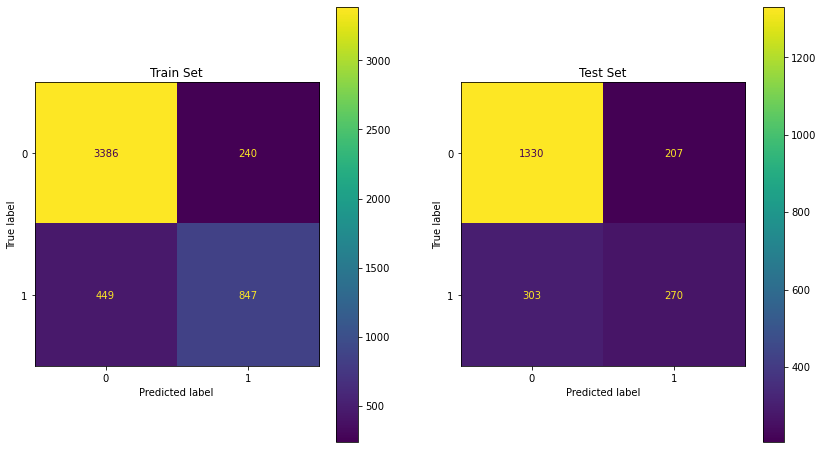

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=10)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

## Checking the Accuracy

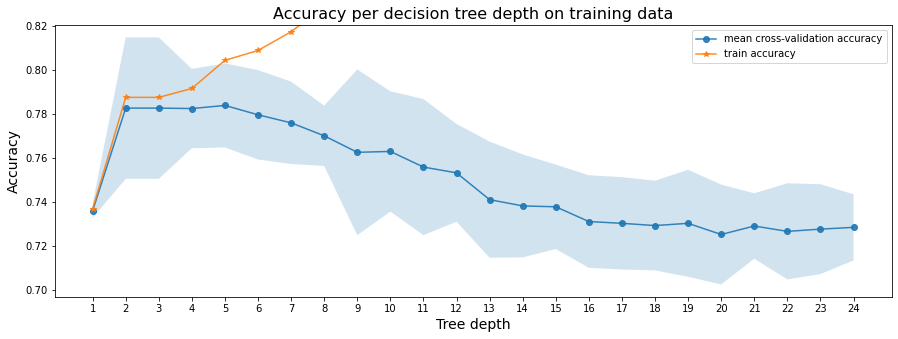

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


# Handling Imblanced Data

## Upsampling the Data

In [35]:
Churn_df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
y = Churn_df2['Churn']
X = Churn_df2.drop(['Churn'], axis=1)

In [38]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [39]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [40]:
data =pd.concat([X_sm, y_sm], axis=1)
data

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
10321,11,0,101.58,1044.80,1
10322,51,0,99.28,5001.27,1
10323,32,0,103.99,3359.06,1
10324,69,0,104.08,7262.42,1


# K-fold Cross Validation

In [41]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [42]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier(n_neighbors=2,weights='uniform')

model_pipeline = [model1, model2, model3]
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'KNNClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'DecisionTreeClassifier': 0.7263336222194708, 'LogisticRegression': 0.7947992241343733, 'KNNClassifier': 0.7586312987495358}


In [43]:
import warnings
warnings.filterwarnings('ignore')
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model= DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(10326, 4)
(10326,)
0.755566311713456
0.9930992736077482


In [44]:
y

0        0
1        0
2        1
3        0
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, Length: 10326, dtype: int64

In [45]:
set(y)

{0, 1}

In [46]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.73123487, 0.75121065, 0.73123487, 0.73547215, 0.74515738])

In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.01


In [48]:
y_test

2834    0
2171    0
2460    1
3520    1
51      1
       ..
8158    1
8759    1
1644    0
8137    1
7780    1
Name: Churn, Length: 2066, dtype: int64

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

# Logistic Regression with Upsampled Data

,Error_metric,Train,Test
0,Accuracy,0.74,0.72
1,Precision,0.73,0.73
2,Recall,0.75,0.74


Confusion matrix for the train set
[[3030 1127]
 [1020 3083]]


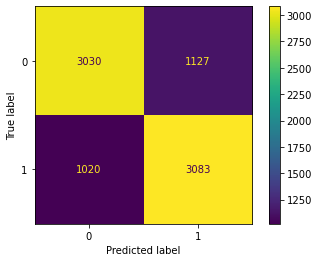



Confusion matrix for the test set
[[711 295]
 [278 782]]


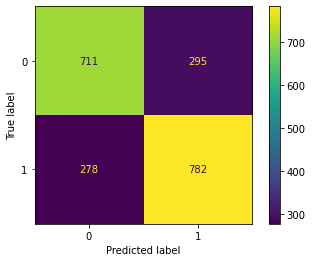

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

# KNN Classifier with Upsampled Data

In [51]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [52]:
X_train.shape

(8260, 4)

In [53]:
X_test_scaled=std_scaler.transform(X_test)

In [54]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.13513446 -0.40744068  0.89842275  0.44203762]
 [-0.70050892 -0.40744068 -1.63674797 -0.84809188]
 [-0.70050892 -0.40744068  1.18358598 -0.41622456]
 ...
 [-0.57516241 -0.40744068 -0.296133   -0.5831464 ]
 [ 0.05157012 -0.40744068 -1.69934478 -0.69825149]
 [-0.61694458 -0.40744068  0.83322256 -0.34484727]]
--------
[[-1.11833061 -0.40744068  0.39243188 -0.90444232]
 [-0.19912289 -0.40744068 -1.16031671 -0.56821731]
 [ 1.80642122  2.45434503  0.65151312  1.8890828 ]
 ...
 [ 0.46939181 -0.40744068 -0.63172145 -0.03805157]
 [ 0.26048097 -0.40744068  0.1769176   0.21240055]
 [ 1.26325303 -0.40744068 -1.64022557 -0.38558788]]


In [55]:
X_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3538,31,0,93.80,3019.50
1311,11,0,20.90,202.30
3710,11,0,102.00,1145.35
4199,72,0,116.80,8456.75
1943,2,0,80.75,159.45
...,...,...,...,...
4023,5,0,51.00,286.80
7259,8,0,102.87,844.96
5200,14,0,59.45,780.85
3775,29,0,19.10,529.50


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

In [57]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
y_test

6159    1
2221    0
5508    0
8216    1
4352    0
       ..
9474    1
2415    0
1176    0
8697    1
4573    0
Name: Churn, Length: 2066, dtype: int64

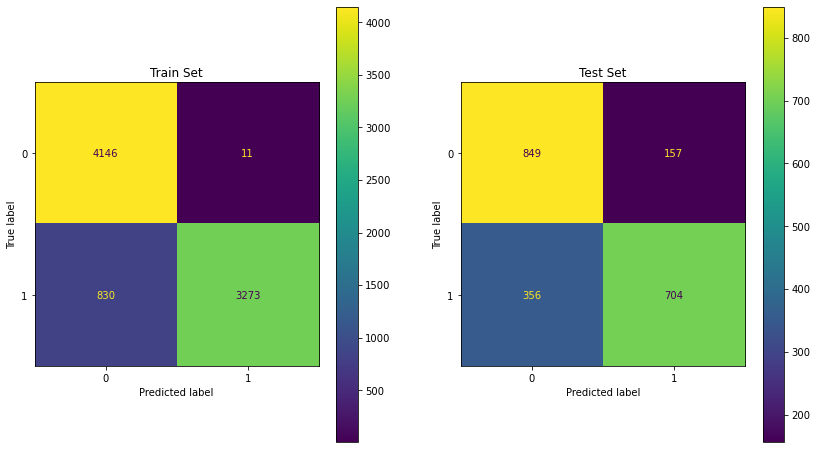

In [59]:
#Classification Model

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [60]:
#Classification Model Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.90,0.75
1,Precision,1.00,0.82
2,Recall,0.80,0.66


# Random Forest Classifier with Smote Upsampled Data

In [72]:
regression_target = Churn_df2['Churn']
# data.head()
y = Churn_df2['Churn']
X = Churn_df2.drop(['Churn'], axis = 1)

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = Churn_df2['Churn']
X = Churn_df2.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [75]:
X_sm.shape

(10326, 4)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [81]:
y_train_regression = X_train
y_test_regression = X_test
# Now we can remove the column target d from the set of features 


In [85]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.7394111570247934
0.7490317583268784


In [86]:
clf.predict_proba(X_test)

array([[0.71323338, 0.28676662],
       [0.65758876, 0.34241124],
       [0.71075327, 0.28924673],
       ...,
       [0.55950806, 0.44049194],
       [0.45615848, 0.54384152],
       [0.82061817, 0.17938183]])

In [87]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

# Tune the Hyper Paramters with Gridsearch and Check The Results

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [91]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [92]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [93]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [94]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.69,0.01,0.03,0.00,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,0.77,0.76,0.75,0.76,0.76,0.01,12,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,1.50,0.06,0.08,0.02,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,0.76,0.77,0.76,0.76,0.76,0.00,11,0.99,0.99,0.99,1.00,0.99,0.99,0.00
2,8.77,0.02,0.35,0.02,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,0.77,0.77,0.77,0.76,0.77,0.00,3,0.99,0.99,0.99,1.00,0.99,0.99,0.00
3,0.85,0.02,0.03,0.00,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,0.76,0.77,0.76,0.75,0.76,0.01,10,0.98,0.98,0.98,0.98,0.98,0.98,0.00
4,1.75,0.06,0.08,0.01,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.78,0.76,0.77,0.76,0.75,0.76,0.01,9,0.98,0.98,0.98,0.99,0.98,0.98,0.00
5,8.02,0.24,0.34,0.05,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,0.77,0.78,0.76,0.76,0.77,0.01,8,0.99,0.99,0.99,0.99,0.99,0.99,0.00
6,0.81,0.05,0.04,0.01,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,0.77,0.77,0.76,0.76,0.77,0.01,4,0.95,0.95,0.94,0.95,0.95,0.95,0.00
7,1.48,0.12,0.06,0.00,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,0.77,0.78,0.75,0.76,0.77,0.01,6,0.95,0.95,0.95,0.95,0.95,0.95,0.00
8,7.69,0.06,0.33,0.02,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,0.77,0.78,0.76,0.76,0.77,0.01,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
9,0.82,0.06,0.04,0.01,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.78,0.77,0.77,0.76,0.76,0.77,0.01,4,0.95,0.95,0.94,0.95,0.95,0.95,0.00


## using the above results 

In [95]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7711757939484871


## Feature Importance

In [96]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [98]:
len(X_train.columns)

4

In [99]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [100]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.38
3,TotalCharges,0.36
0,tenure,0.24
1,SeniorCitizen,0.02


In [101]:
clf.feature_importances_

array([0.24079097, 0.01942809, 0.38443315, 0.35534779])